In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from IPython.core.pylabtools import figsize 
%matplotlib inline

In [2]:
integral = pd.read_csv("../data/processed/integral/dataset.csv.gz", index_col="MUTANT").drop("TYPE", 1)

# genomic = pd.read_csv("../data/processed/genomic/dataset.csv.gz", index_col='MUTANT').drop("TYPE", 1)
varq = pd.read_csv("../data/processed/varq/dataset.csv.gz", index_col="MUTANT")

full = varq.merge(integral, right_index=True, left_index=True, how="left")

In [4]:
integral.shape

(68508, 63)

In [5]:
varq.shape

(7418, 10)

In [6]:
full.shape

(7418, 73)

In [4]:
full

,SASA,SASA_PERCENTAGE,BFACTOR,SWITCHBILITY,AGGREGABILITY,CONSERVATION,3DID,PDB,VARIATION_ENERGY,TYPE,...,AROMATICITY_DIFF,AROMATICITY_LOG_RATIO,ISOELECTRIC_POINT_DIFF,ISOELECTRIC_POINT_LOG_RATIO,GRAVY_DIFF,GRAVY_LOG_RATIO,INSTABILITY_INDEX_DIFF,INSTABILITY_INDEX_LOG_RATIO,FLEXIBILITY_DIFF,FLEXIBILITY_LOG_RATIO
MUTANT,,,,,,,,,,,,,,,,,,,,,
P11362-174-V-A,6.038,0.03,32.2800,NaN,0.000,NaN,False,False,2.699420,Pathogenic,...,0.004167,1.939356,0.000000,2.000000,0.108333,-1.133255,5.144583,1.980056,0.010005,1.992941
Q8WZA1-504-V-I,90.814,0.51,67.4650,0.00000,NaN,NaN,False,False,-0.341963,Benign,...,0.012500,1.942567,0.000000,2.000000,0.270000,-0.093313,11.150000,1.717239,0.006271,1.995324
P46100-243-C-F,1.143,0.00,0.0000,0.06610,NaN,NaN,False,False,26.057600,Pathogenic,...,0.070833,1.484365,0.680176,1.976554,0.240000,3.053142,3.064167,1.987204,0.013749,2.010017
P11473-362-T-I,0.214,0.00,11.2900,0.00000,NaN,NaN,False,False,-0.832075,Benign,...,0.004167,1.939356,0.000000,2.000000,0.534583,8.208776,49.244583,1.791824,0.015824,2.011477
Q9NXN4-106-G-S,0.000,0.00,37.4300,0.04100,0.000,0.24,True,False,2.827400,Benign,...,0.000000,NaN,0.849976,2.039393,0.134583,NaN,27.783333,1.743547,0.010471,2.007416
P07101-375-F-L,4.589,0.01,44.1225,0.00000,NaN,NaN,False,False,1.240750,Pathogenic,...,0.058333,2.825004,0.000000,2.000000,0.101250,3.398329,7.445417,2.145659,0.001667,1.998780
P12883-204-R-C,76.284,0.29,4.7600,0.00000,0.000,0.34,False,False,-0.626310,Pathogenic,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P40692-68-I-N,37.920,0.18,44.9725,1.53000,0.000,0.23,True,False,2.216710,Pathogenic,...,0.000000,NaN,0.000000,2.000000,0.565000,NaN,7.836667,2.284552,0.016368,1.988717
O95497-325-A-E,29.466,0.24,39.7600,0.03170,10.032,NaN,False,False,-0.237174,Benign,...,0.004167,1.939356,0.000000,2.000000,0.168750,1.570652,6.372083,1.987716,0.003816,1.997327


In [9]:
varq[~varq.index.isin(integral.index)].shape

(774, 10)

In [8]:
varq.columns

Index(['SASA', 'SASA_PERCENTAGE', 'BFACTOR', 'SWITCHBILITY', 'AGGREGABILITY',
       'CONSERVATION', '3DID', 'PDB', 'VARIATION_ENERGY', 'TYPE'],
      dtype='object')

In [9]:
cat_vars_genomic = ['INTRON','MISSENSE', 'NEAR-GENE', 'NCRNA', 'CODING-SYNON', 'UNTRANSLATED',
       'NONSENSE', 'SPLICE', 'STOP-LOSS']

cat_vars_structural = ['BINDING','ACT_SITE','SITE','LIPID','METAL','CARBOHYD',
                       'DNA_BIND','NP_BIND','CA_BIND','DISULFID','SE_CYS','MOD_RES','PROPEP','SIGNALP',
                       'TRANSMEM','COMPBIAS','REP','MOTIF','ZN_FING','REGIONS','PPI','RNABD','TF','LOC',
                       'MMBRBD','CHROM','POSTMODREC','POSTMODENZ']

cat_vars_varq = ["3DID", "PDB"]

cat_vars  = cat_vars_genomic + cat_vars_structural + cat_vars_varq

cont_vars = full.columns.drop(cat_vars + ["TYPE"], 1).tolist()

In [12]:
nulcount

VARIATION_ENERGY               0.000000
SASA                           0.046913
SASA_PERCENTAGE                0.046913
BFACTOR                        0.046913
SWITCHBILITY                   0.096252
INSTABILITY_INDEX_DIFF         0.104341
GRAVY_DIFF                     0.104341
ISOELECTRIC_POINT_LOG_RATIO    0.104341
ISOELECTRIC_POINT_DIFF         0.104341
AROMATICITY_DIFF               0.104341
TRANSITION                     0.104341
VB                             0.104341
JM                             0.104341
BLOSUM                         0.104341
PAM250                         0.104341
EX                             0.104341
POLARITY                       0.104341
GRANTHAM                       0.104341
HYDROPHOBICITY                 0.104341
VOLUME                         0.104341
CHARGE                         0.104341
FLEXIBILITY_DIFF               0.108520
FLEXIBILITY_LOG_RATIO          0.108520
INSTABILITY_INDEX_LOG_RATIO    0.211917
GRAVY_LOG_RATIO                0.267323


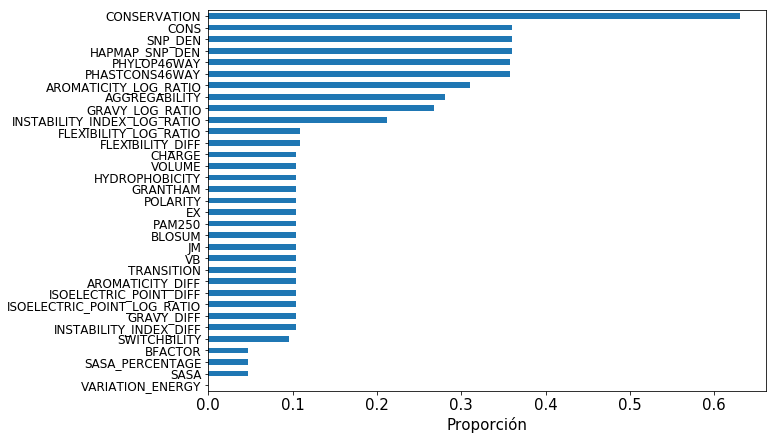

In [11]:
with_type = full[cont_vars]
nulcount = (with_type.isnull().sum(axis=0) / with_type.shape[0]).sort_values(ascending=True)
plt.figure(figsize=(10,7))
# plt.title("Cantidad de variantes con valor nulo")
plt.yticks(size=12)
plt.xticks(np.arange(0, 2, 0.1), size=15)

plt.xlabel("Proporción", size=15)
ax = nulcount.plot(kind="barh")
